In [1]:
from scipy.io.wavfile import write, read
import numpy as np
from matplotlib import pyplot
from scipy.fft import fft, fftfreq, rfft, rfftfreq, irfft
from python_speech_features import mfcc, logfbank


In [2]:
SAMPLE_RATE = 48000  # Samples per second

48000
[[ 0  0]
 [ 0  0]
 [ 0  0]
 ...
 [ 9  9]
 [ 9 10]
 [ 4  4]]
<class 'numpy.ndarray'>
[0 0 0 ... 9 9 4]
[ 0  0  0 ...  9 10  4]
[0.  0.  0.  ... 9.  9.5 4. ]
117.03466666666667
[0.00000000e+00 2.08333333e-05 4.16666667e-05 ... 1.16999938e+02
 1.16999958e+02 1.16999979e+02]


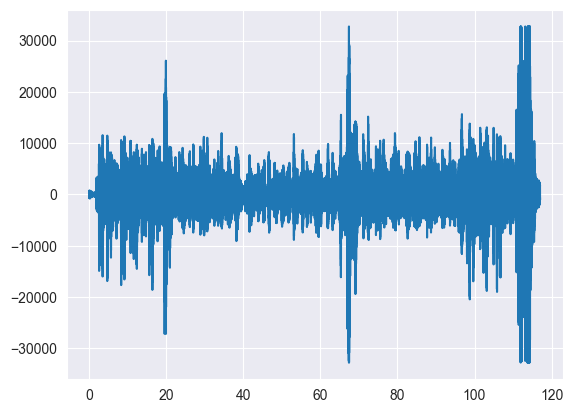

In [3]:
sample_rate, data = read("wavfiles/Malaguena.wav")
print(sample_rate)
print(data)
print(type(data))
print(data[:, 0]) # LEFT CHANNEL
print(data[:, 1]) # RIGHT CHANNEL
left_channel_data = data[:, 0]
right_channel_data = data[:, 1]
mixed_channel_data = np.mean(data, axis=1)

print(mixed_channel_data)

duration = len(mixed_channel_data)/sample_rate

print(duration)

# time = np.arange(0, duration, 1/sample_rate) # time vector
time = np.linspace(0, int(duration), sample_rate * int(duration), endpoint=False)

print(time)

pyplot.plot(time, mixed_channel_data[0:int(duration)*sample_rate])
pyplot.show()

Applying FFT on the time domain representation

[-1824012.5            +0.j           -98327.90094263+370786.03919828j
   680588.27758191-526621.45050817j ...   -20044.56438154 +12976.92318309j
   -17165.4002058  +10228.18246305j   -44445.5            +0.j        ]


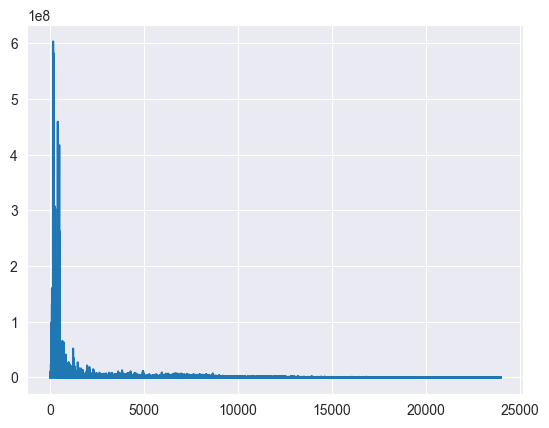

1417262.8994566826
701990.1434296023
602821391.0604254


In [4]:
yf = rfft(mixed_channel_data[0:sample_rate*int(duration)])
xf = rfftfreq(sample_rate * int(duration), 1 / sample_rate)

print(yf)
absolute_values_of_complex_numbers = np.abs(yf)

pyplot.plot(xf, absolute_values_of_complex_numbers)
pyplot.show()

print(absolute_values_of_complex_numbers[164])
print(absolute_values_of_complex_numbers[165])
print(max(absolute_values_of_complex_numbers))

[[ 8.61147572  9.39658368  9.87651611 ...  8.333581    8.21664033
   7.52764935]
 [ 7.52955237  9.59500071 10.84700977 ...  7.46614444  8.31314308
   8.03320336]
 [ 6.30912034  7.33133106  7.35567162 ...  7.03838851  6.57227342
   6.01700821]
 ...
 [ 9.09343735  9.49235419  9.52302921 ...  8.83884549  8.88789322
   8.76315052]
 [ 9.02915397  9.39820176  9.1807776  ...  9.18817473  9.36061304
   9.10512102]
 [ 8.69702035  9.20332373  9.13248008 ...  9.30028511  9.30289433
   8.91434955]]
[[ 11.96981671  12.52873287  12.65176982 ...  11.31106343  11.36756592
   11.13163167]
 [-11.50906572  -9.68518141  -8.33131776 ...  -7.2469499   -7.59461467
   -7.56248435]
 [  5.27228788   5.06758742   6.97005292 ...   9.1585068    9.78742594
    7.16520386]
 ...
 [ -4.16661015  -5.28090159  -3.67993576 ...   3.6333994    7.01273952
    6.0356284 ]
 [  1.35555083  -0.24338877  -2.28593247 ...   1.84820021   2.68094569
    3.39234427]
 [  9.46793301  10.23864654   9.03069638 ...   1.59899551  -1.150732

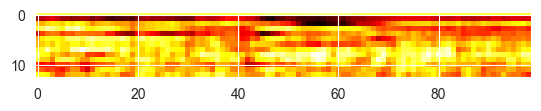

In [5]:
# Converting to a spectrogram
bank = logfbank(mixed_channel_data[0:sample_rate], SAMPLE_RATE, nfilt=26, nfft=1200).T

mel = mfcc(mixed_channel_data[0:sample_rate], SAMPLE_RATE, numcep=13, nfilt=26, nfft=1200).T

print(bank)
print(mel)

pyplot.imshow(bank, cmap='hot', interpolation='nearest')
pyplot.imshow(mel, cmap='hot', interpolation='nearest')

(128, 94)
(128, 94)


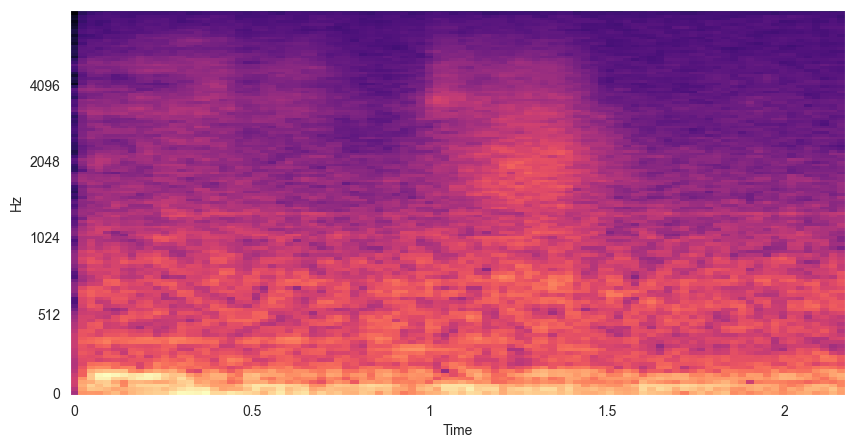

In [14]:
from matplotlib import pyplot as plt
import librosa

mel_spec = librosa.feature.melspectrogram(y=mixed_channel_data[:sample_rate], sr=sample_rate)
print(mel_spec.shape)

# Convert to log scale (dB)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
print(mel_spec_db.shape)

plt.figure(2, figsize=(10,5))
librosa.display.specshow(mel_spec_db, x_axis='time',
                        y_axis='mel', sr=22050,
                        fmax=8000)

Text(0.5, 0, 'time')

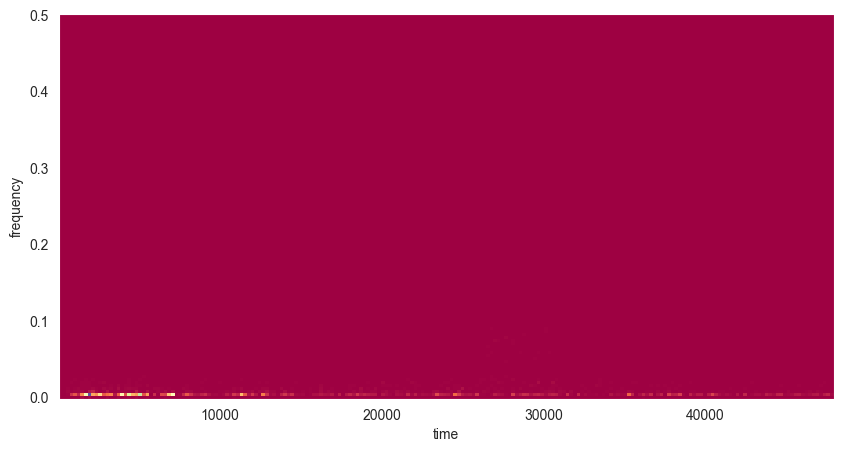

In [10]:
from scipy.signal import spectrogram

plt.figure(3, figsize=(10,5))
f, t, s = spectrogram(mixed_channel_data[:sample_rate])
plt.pcolormesh(t, f, s, cmap='Spectral')
plt.ylabel('frequency')
plt.xlabel('time')

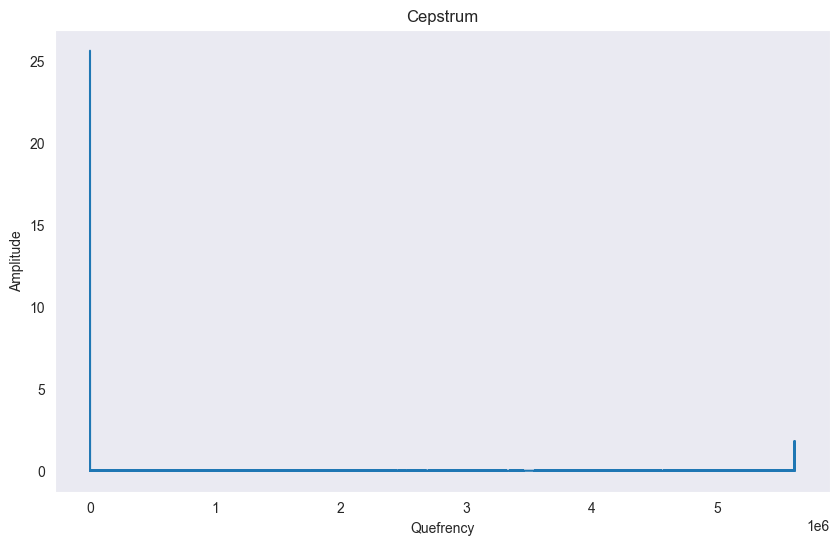

In [17]:
from scipy.fft import ifft

# Step 2: Compute the Fourier Transform of the signal
spectrum = rfft(mixed_channel_data)

# Step 3: Compute the log of the power spectrum
log_spectrum = np.log(np.abs(spectrum) ** 2)

# Step 4: Compute the inverse Fourier Transform of the log power spectrum
cepstrum = np.abs(irfft(log_spectrum))

# Step 5: Plot the cepstrum
plt.figure(figsize=(10, 6))
plt.plot(cepstrum)
plt.title('Cepstrum')
plt.xlabel('Quefrency')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

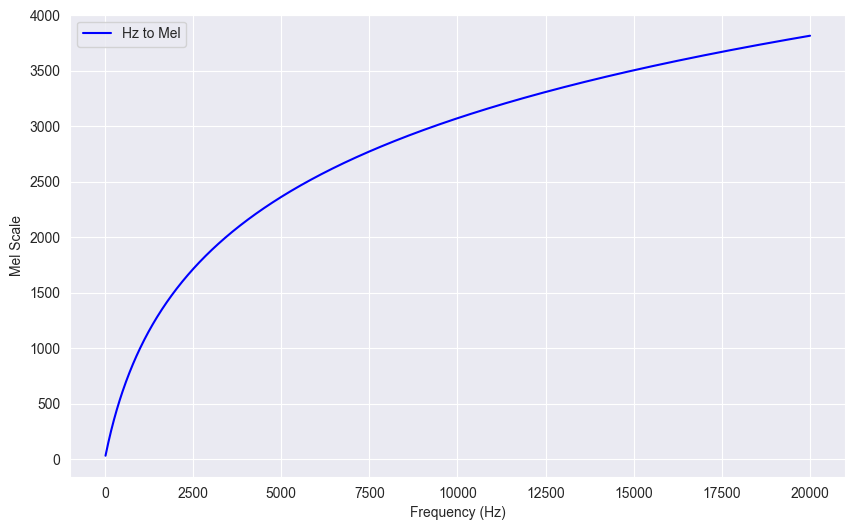

In [19]:
# Define the conversion from Hz to Mel
def hz_to_mel(hz):
    return 2595 * np.log10(1 + hz / 700)

# Define the conversion from Mel to Hz
def mel_to_hz(mel):
    return 700 * (10**(mel / 2595) - 1)

# Generate a range of frequencies in Hz
hz_values = np.linspace(20, 20000, 1000)  # From 20 Hz to 20 kHz
mel_values = hz_to_mel(hz_values)

# Plot the relationship
plt.figure(figsize=(10, 6))
plt.plot(hz_values, mel_values, label='Hz to Mel', color='blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Mel Scale')
plt.grid(True)
plt.legend()
plt.show()


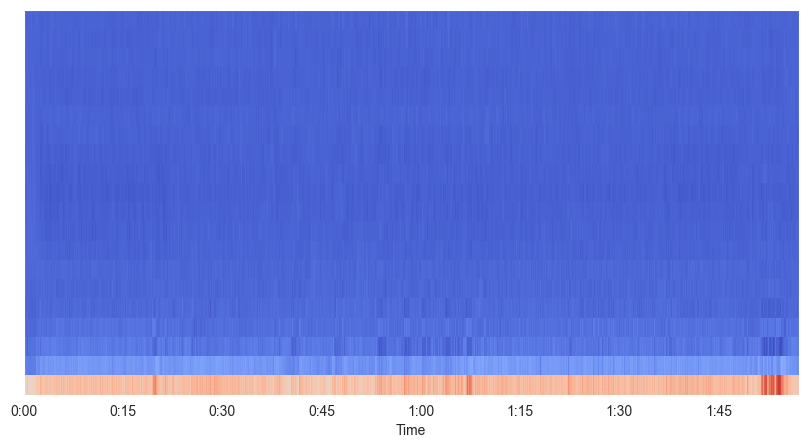

In [20]:
mfccs = librosa.feature.mfcc(y=mixed_channel_data, sr=sample_rate)


plt.figure(6, figsize=(10,5))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')